In [1]:
from statsmodels.tsa.stattools import adfuller
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
#from pmdarima.arima.utils import ndiffs
from statsmodels.tsa.arima.model import ARIMA
%run /Users/beyzabozdag/Desktop/ANTteam/model_ant_trajectories/data_prep/trackfuns.py
from sklearn.metrics import mean_squared_error
import math

In [2]:
#load data file
df = pd.read_csv(r'/Users/beyzabozdag/Desktop/ANTteam/HRM_V1_ants.txt')

#only take the id of a single ant
df = df[df.id==1]

#display dataFrame
df

,x,y,t,id,dFrames,s,v,a,disp,theta,alpha,sin,cos,adist,wall,nestDisp,tandem
0,2151.561,573.3278,844.0400,1,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,0,5.629094,0
1,2151.622,571.3275,844.6139,1,0.573914,2.001236,3.486999,NaN,2.001236,178.252300,-21.38438,-0.364623,0.931155,-10.685590,0,6.457055,0
2,2152.409,569.4856,845.7763,1,1.162415,2.002953,1.723097,-1.517446,3.934669,156.867900,-23.89192,-0.405013,0.914311,-11.928350,0,8.166318,0
3,2153.877,568.1178,846.4784,1,0.702087,2.006476,2.857872,1.616287,5.701561,132.976000,35.20982,0.576572,0.817046,17.548090,0,10.169530,0
4,2154.287,566.1569,847.1371,1,0.658691,2.003313,3.041353,0.278554,7.671588,168.185800,-72.23763,-0.952330,0.305070,-36.059070,0,11.810170,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
516,2168.405,579.6193,1083.5890,1,0.333984,2.006440,6.007586,-8.517383,17.980630,-6.609848,-36.04593,-0.588434,0.808546,-17.965120,0,22.857120,0
517,2167.046,581.0945,1083.8840,1,0.295044,2.005824,6.798390,2.680292,17.323450,-42.655780,-25.61725,-0.432357,0.901702,-12.771440,0,21.919100,0
518,2165.182,581.8373,1084.2290,1,0.344971,2.006563,5.816619,-2.845955,16.060460,-68.273030,-18.60758,-0.319085,0.947726,-9.273358,0,20.393980,0
519,2163.176,581.9466,1084.5140,1,0.285034,2.008836,7.047701,4.319069,14.463450,-86.880620,-16.87312,-0.290253,0.956950,-8.399453,0,18.572460,0


In [3]:
#this is the function that will be used to translate turn angles (alpha) to xy coordinates.
def angles_to_xy(a, d = 2):
    x = []
    y = []
    x0 = 0
    y0 = 0
    ang_new=0
    x.append(x0)
    y.append(y0)
    for ai in a:
        ang_new = (ang_new+ai)%360
        xi = x0 - d*np.cos(np.radians(ang_new))
        yi = y0 - d*np.sin(np.radians(ang_new))
        x.append(xi)
        y.append(yi)
        x0 = xi
        y0 = yi
    return [x,y][::-1]

In [4]:
import warnings
warnings.filterwarnings("ignore")

In [5]:
#this is the list of numbers that the model will use for 
#forecasting as the p and d values, d (differencing) is set to 0.
model_pq = [10, 11, 12, 13, 14, 15, 20, 22, 25, 30, 35, 40, 60, 70]

In [6]:
# Create Training and Test
train = df.alpha[0:400]
test = df.alpha[400:500]

model:10-0-10


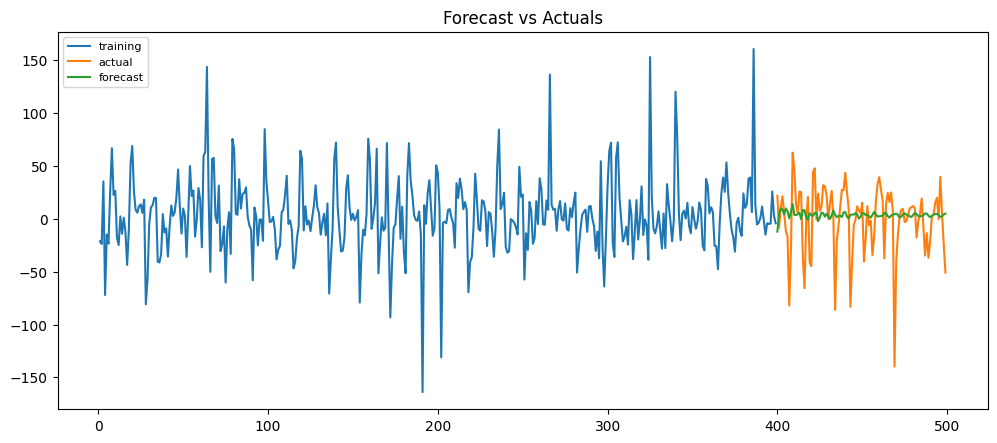

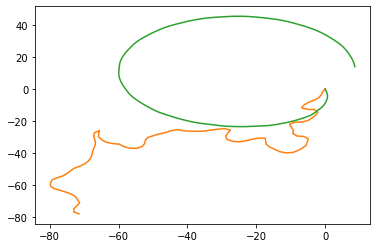

model:11-0-11


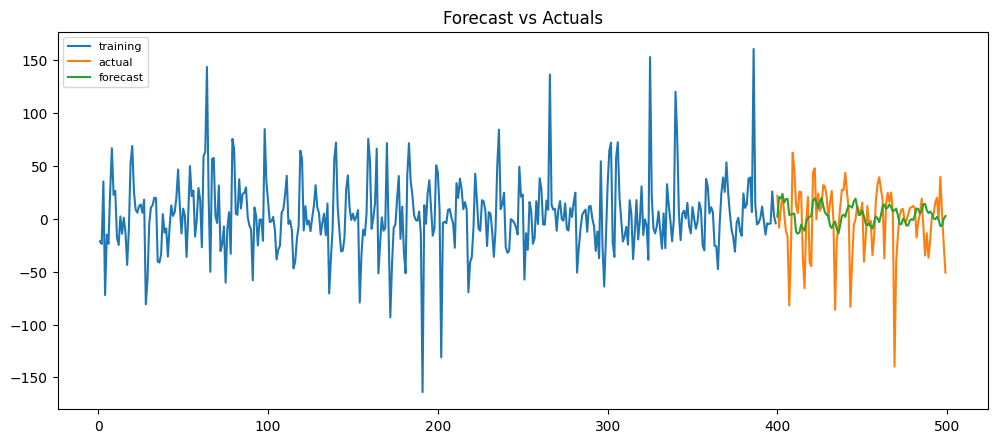

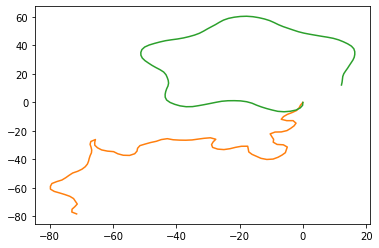

model:12-0-12


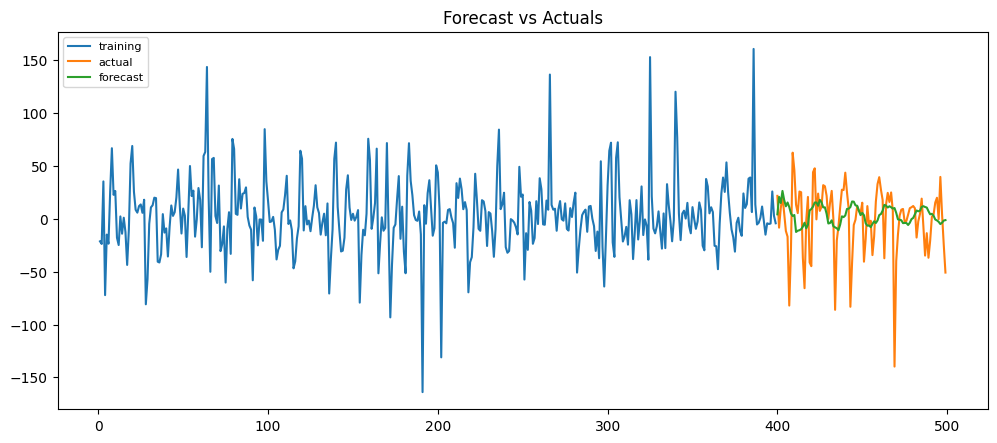

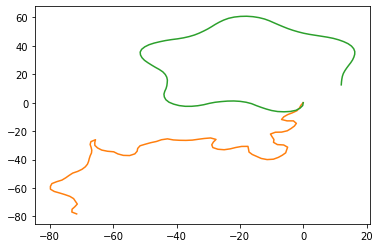

model:13-0-13


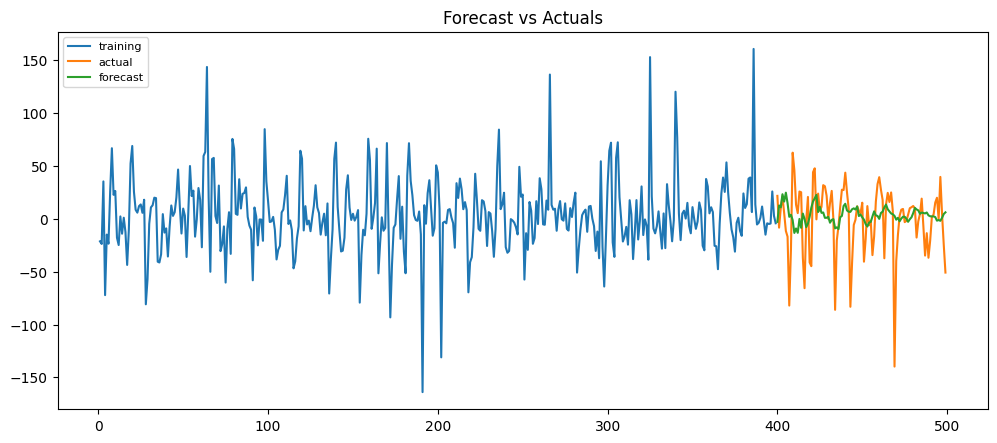

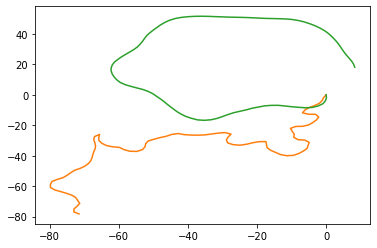

model:14-0-14


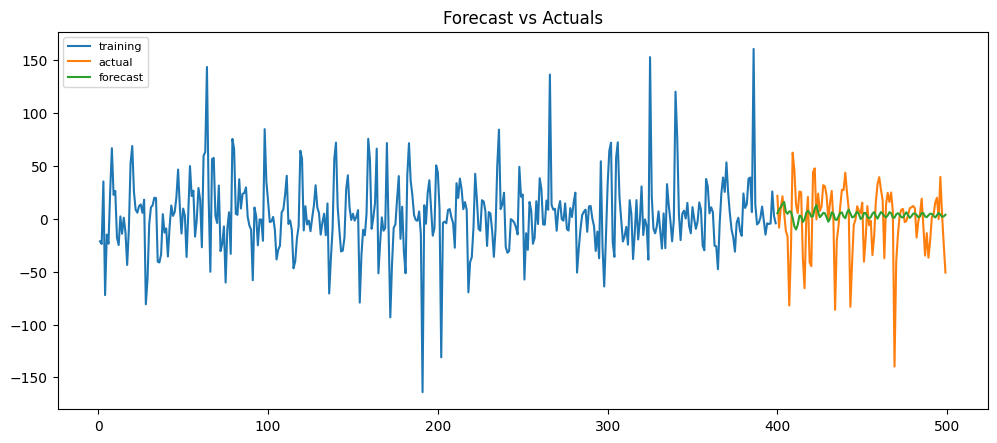

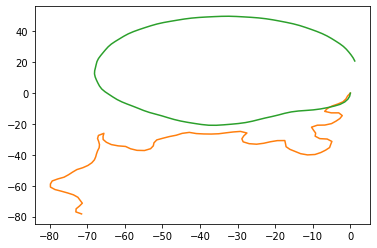

model:15-0-15


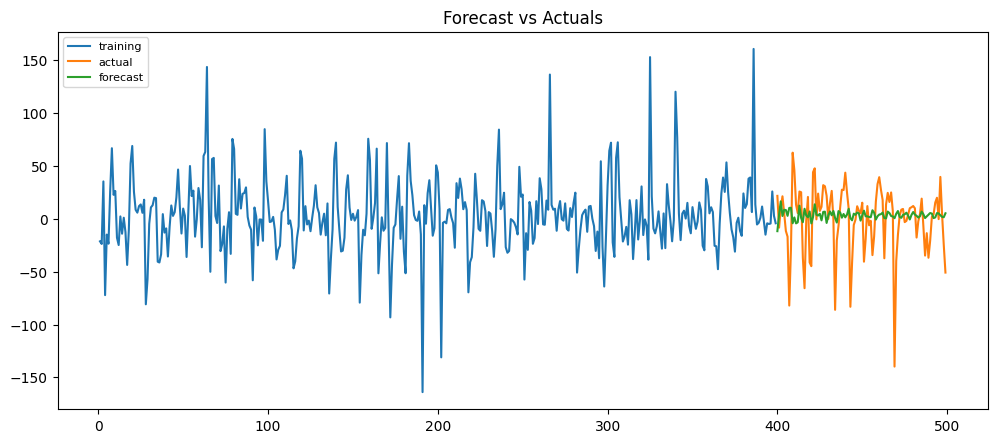

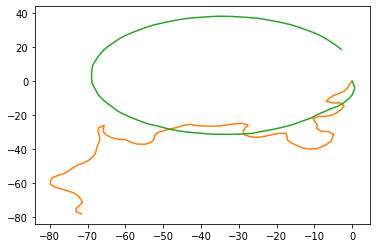

model:20-0-20


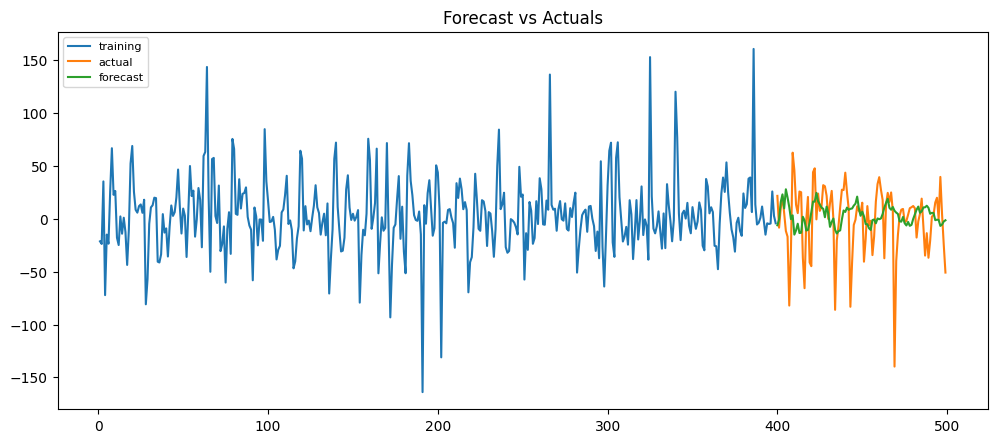

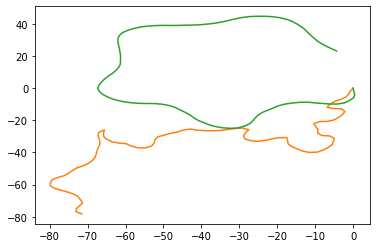

model:22-0-22


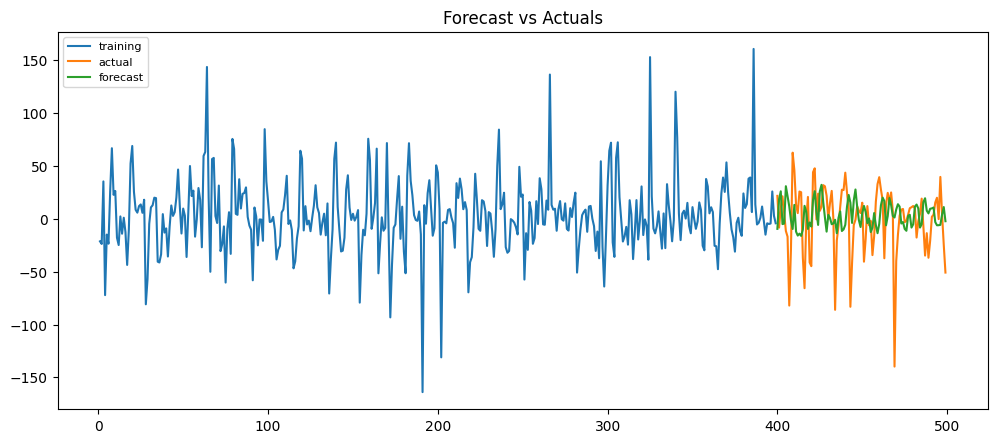

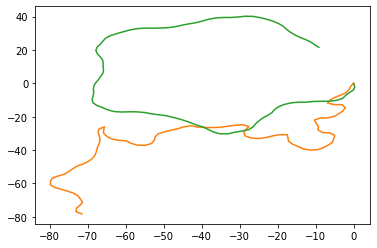

model:25-0-25


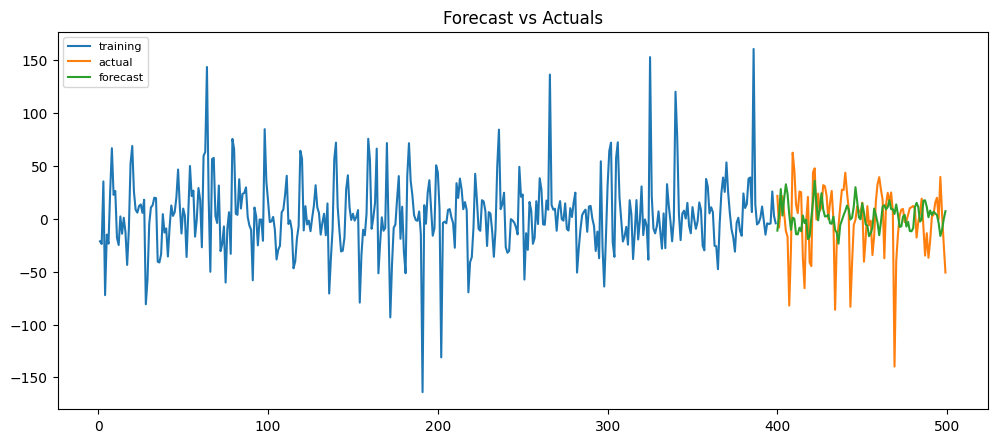

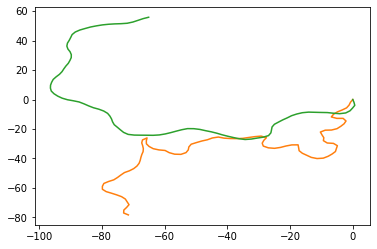

model:30-0-30


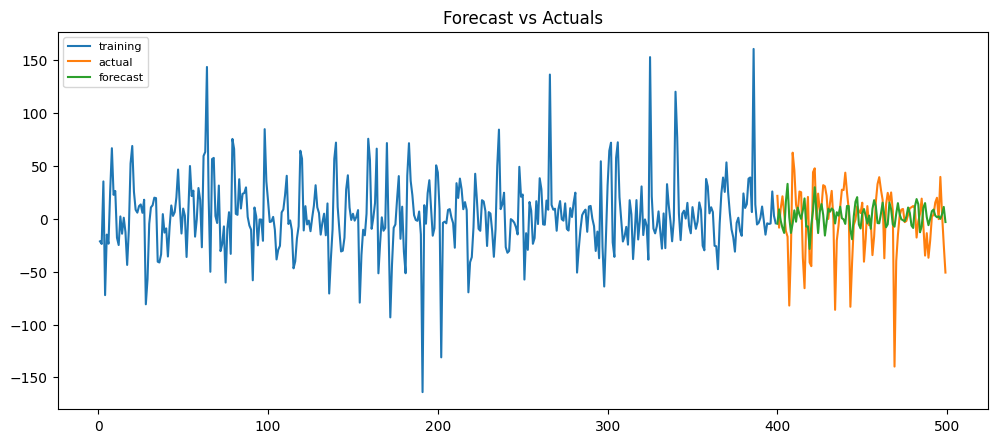

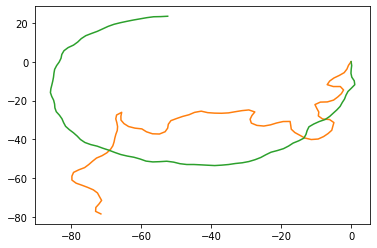

model:35-0-35


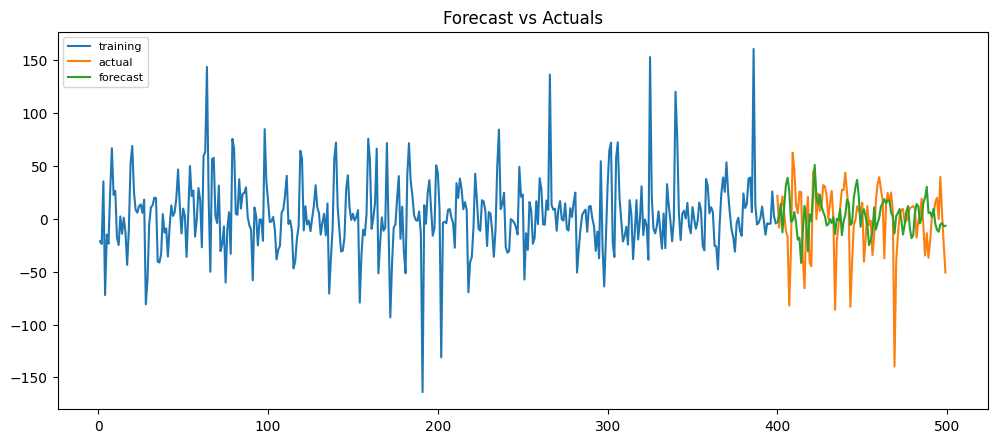

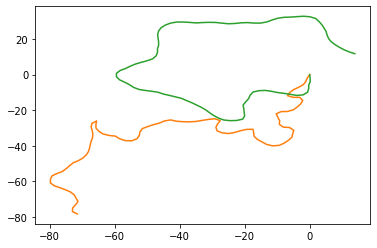

model:40-0-40


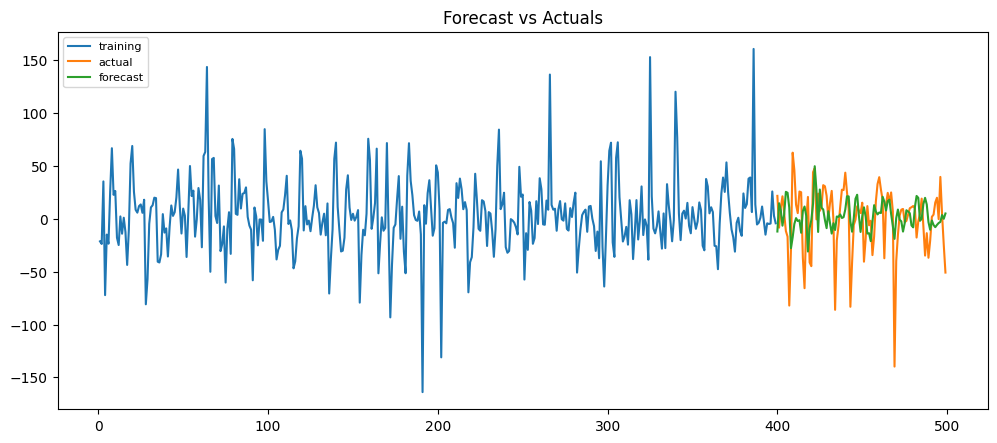

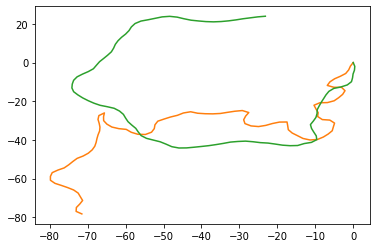

model:60-0-60


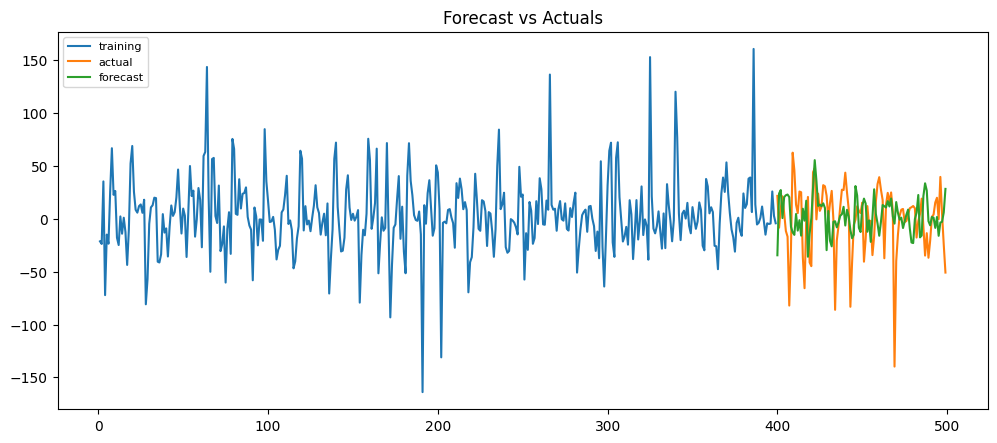

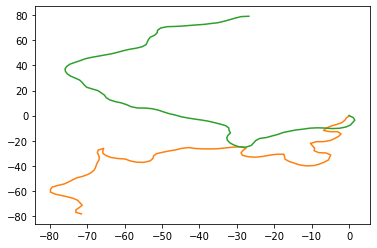

model:70-0-70


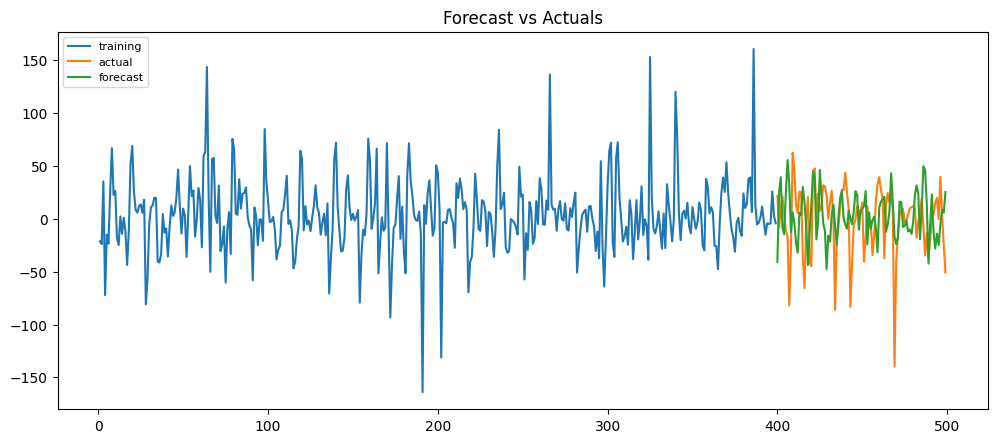

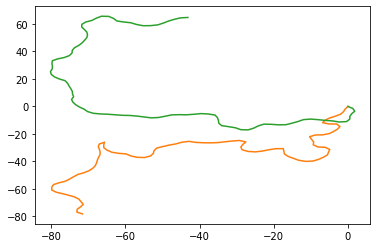

In [7]:
# in a loop al the values will be graphed and translated to x y coordinates for both 
# the actual and the forecasted values.
for pq in model_pq: 
    print(f"model:{pq}-0-{pq}")
    model = ARIMA(train, order=(pq, 0, pq))  
    fitted = model.fit()

    # Forecast
    fc = fitted.forecast(100, alpha=0.05)  # 95% conf

    # Make as pandas series
    fc_series = pd.Series(fc, index=test.index)

    # Plot
    plt.figure(figsize=(12,5), dpi=100)
    plt.xscale("linear")
    plt.plot(train, label='training')
    plt.plot(test, label='actual')
    plt.plot(fc_series, label='forecast')
    plt.title('Forecast vs Actuals')
    plt.legend(loc='upper left', fontsize=8)
    plt.show()

    test_x, test_y = angles_to_xy(test)
    plt.plot(test_x, test_y, label='training', color="tab:orange")

    forecast_x, forecast_y = angles_to_xy(fc_series)
    plt.plot(forecast_x, forecast_y, label='forecast', color="tab:green")
    
    plt.show()

In [13]:
#Create 2 dataFrames with the forecasted and actual values of the turn angles to use them for histograms.

df_test = df[400:500]

#copy test to create forecast
df_forecast = df_test.copy()

#change the alpha values of the forecast dataFrame (the test dataFrame is 
#already correct since it is copied from the original dataFrame)
df_forecast["alpha"] = fc_series

# add coord for test data
test_x, test_y = angles_to_xy(test)
df_test['x'] = test_x[1:]
df_test['y'] = test_y[1:]

#add coord for forecast data
forecast_x, forecast_y = angles_to_xy(fc_series)
df_forecast['x'] = forecast_x[1:]
df_forecast['y'] = forecast_y[1:]


In [14]:
#Display test dataFrame and write to file
df_test
df_test.to_csv("test.txt")

In [15]:
#Display forecast dataFrame and write to file
df_forecast
df_forecast.to_csv("forecast.txt")